In [1]:
# import pandas
import pandas as pd

# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Objective: 

- Fit Hierarchical clustering, 
- find optimal number of clusters via dendrogram 
- and plot clusters. 

Again, to simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset only.

In [6]:
df2 = df.iloc[:, 3:]
df2.head(10)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


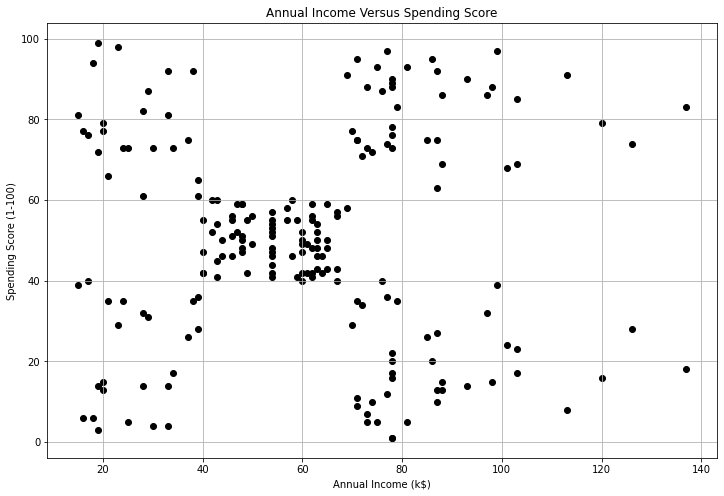

In [7]:
# We will plot the data.

plt.scatter(df2["Annual Income (k$)"], 
            df2["Spending Score (1-100)"],
            c='black',
            marker='o')
plt.title('Annual Income Versus Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()

* define function plot_dendogram (similarly to what we have done in the walkthrough)

In [8]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

* Plot dendrogram

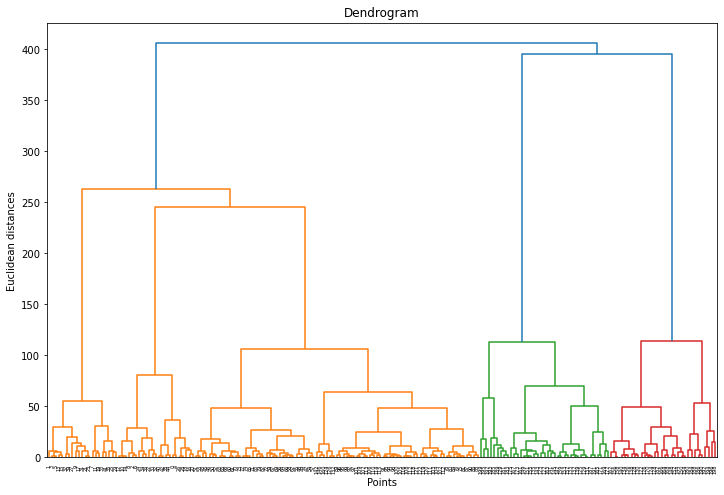

In [9]:
df2.pipe(plot_dendrogram)

From the dendrogram, the optimal number of clusters is 3.

* Fit Hierarchical clustering with optimal number of clusters

In [14]:
# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

In [15]:
# fit and predict
df2["Clusters"] = ac.fit_predict(df2)
df2.head(10)

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
5,17,76,3
6,18,6,4
7,18,94,3
8,19,3,4
9,19,72,3


* define function plot_clusters

In [16]:
def plot_clusters(df, plt_cluster_centers = False):
    """Returns a plot of clusters and their centroids from a dataframe with 2 
    columns and an extra column of cluster labels."""
    
    X_centroids = []
    Y_centroids = []

    for cluster in set(df.iloc[:, 2]):
        mask = (df.iloc[:, 2] == cluster)
        x = df[mask].iloc[:, 0]
        y = df[mask].iloc[:, 1]
        X_centroids.append(x.mean())
        Y_centroids.append(y.mean())

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.title('Cluster Plot')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.grid()
    plt.show()    

* Plot HC clusters

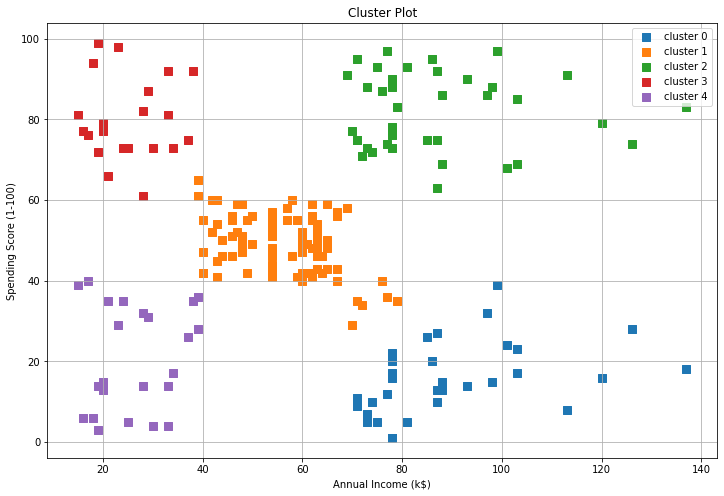

In [17]:
df2.pipe(plot_clusters)

I will need to ask for help because I do not understand how to find the optimal number of clusters from the dendrogram.